In [ ]:
import pandas as pd
from json import load, dump
from dataset import process_BindingDB, get_cliffs, split_data

import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing

In [ ]:
df = pd.read_csv('/mnt/data/BindingDB_All.tsv', sep = '\t', on_bad_lines='skip')
df.head()

In [ ]:
X_drug, X_SMILES, X_target, y = process_BindingDB('/mnt/data/BindingDB_All.tsv',
                                         y = 'Ki', 
                                         binary = False, 
                                         convert_to_log = True)

In [ ]:
bindingdb_d_t_ki = pd.DataFrame({'drug': X_drug, 'SMILES': X_SMILES, 'target': X_target, 'Ki': y})

In [ ]:
bindingdb_d_t_ki.to_csv('../analysis/bindingdb_d_t_ki.csv', index=False)

In [ ]:
data_ki= pd.read_csv('../analysis/bindingdb_d_t_ki.csv')

In [ ]:
data_ki.head()

In [ ]:
data_ki.columns = 'drug', 'SMILES', 'target', 'affinity'

In [ ]:
data_ki.head()

In [ ]:
cliff_pairs = get_cliffs(data_ki, threshold_affinity=1, threshold_similarity=0.9)

In [ ]:
cliff_pairs

In [ ]:
cliff_pairs_no_dup = cliff_pairs.drop_duplicates()

In [ ]:
cliff_pairs.shape

In [ ]:
cliff_pairs_no_dup.shape

In [ ]:
#cliff_pairs_no_dup.to_csv('../analysis/bindindb_ki_cliff_pairs_ta1_ts0.9.csv', index=False)

# EDA

In [96]:
target_counts = pd.DataFrame(cliff_pairs_no_dup['target'].value_counts())

In [97]:
target_counts

,count
target,
Apoptosis regulator Bcl-2,58274
Arachidonate 5-lipoxygenase-activating protein,10667
Bcl-2-like protein 1,8769
D(2) dopamine receptor,8099
5-hydroxytryptamine receptor 2A,7887
...,...
3-dehydroquinate synthase,1
"Glycine amidinotransferase, mitochondrial",1
Neuronal acetylcholine receptor subunit alpha-9,1


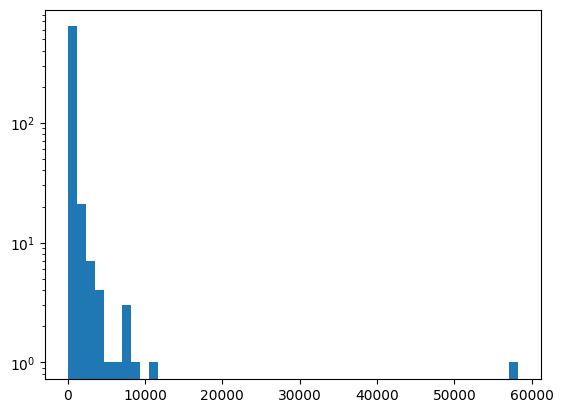

In [94]:
plt.hist(target_counts['counts'], bins=50, log=True)
plt.xlabel('Value')  
plt.ylabel('Frequency')
plt.title('Histogram of Counts on Log Scale')
plt.show()

<Axes: xlabel='counts', ylabel='Count'>

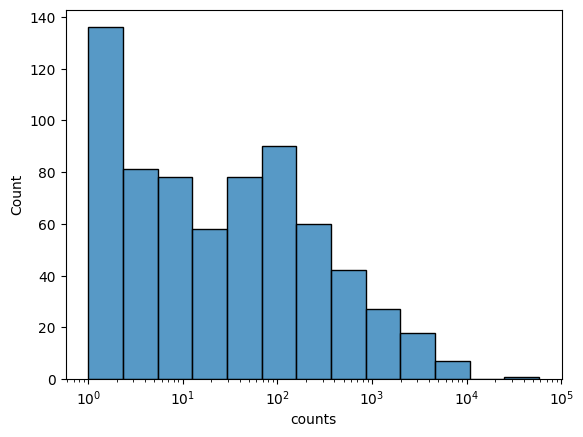

In [91]:
sns.histplot(data = target_counts['counts'], log_scale=True)

# Split data for DDC task

In [48]:
cliff_pairs_no_dup =  pd.read_csv('../analysis/bindindb_ki_cliff_pairs_ta1_ts0.9.csv')

In [49]:
cliff_pairs_no_dup.shape

(252803, 6)

In [ ]:
target_ids = {t:i for i, t in enumerate(set(cliff_pairs_no_dup.target))}
dump(target_ids, open('../analysis/target_mapping_bdb.json', 'w'))

In [ ]:
target_ids = load(open('../analysis/target_mapping_bdb.json'))
cliff_pairs_no_dup.loc[:, 'target'] = cliff_pairs_no_dup['target'].apply(target_ids.__getitem__)

In [ ]:
cliff_pairs_split_random = split_data(cliff_pairs_no_dup, split='random')
cliff_pairs_split_random.to_csv('../analysis/bindingdb_ki_cliff_pairs_ta1_ts0.9_r_wt.csv', index=False)

In [ ]:
cliff_pairs_split_random['cliff'].value_counts()

In [ ]:
cliff_pairs_split_cb = split_data(cliff_pairs_no_dup, split='compound-based')
cliff_pairs_split_cb.to_csv('../analysis/bindingdb_ki_cliff_pairs_ta1_ts0.9_cb_wt.csv', index=False)

In [ ]:
cliff_pairs_split_cb['cliff'].value_counts()

In [ ]:
cliff_pairs_split_random.head()

In [ ]:
cliff_pairs_split_cb.head()

In [ ]:
cliff_pairs_split_random = pd.read_csv('../analysis/bindingdb_ki_cliff_pairs_ta1_ts0.9_r_wt.csv')

In [ ]:
cliff_pairs_split_random['target'].nunique()

In [ ]:
cliff_pairs_split_random

# Split data for DTI task

In [ ]:
data_ki= pd.read_csv('../analysis/bindingdb_d_t_ki.csv')

In [46]:
data_ki.shape

(78628, 6)

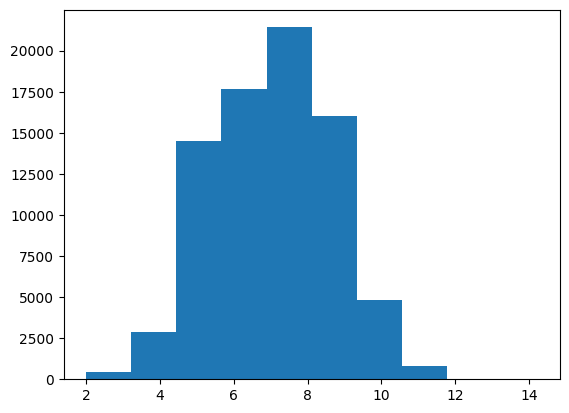

In [45]:
plt.hist(data_ki['affinity'])
plt.show() 

In [44]:
data_ki.head()

,drug,smiles,target,affinity,ROMol,valid_smiles
0,"(4R,5S,6S,7R)-4,7-dibenzyl-5,6-dihydroxy-1,3-b...",O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,529,9.602060,<rdkit.Chem.rdchem.Mol object at 0x00000209F3F...,True
1,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,529,9.387216,<rdkit.Chem.rdchem.Mol object at 0x00000209F3F...,True
2,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,529,9.096910,<rdkit.Chem.rdchem.Mol object at 0x00000209F3F...,True
3,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,529,9.004365,<rdkit.Chem.rdchem.Mol object at 0x00000209F3F...,True
4,"(4R,5S,6S,7R)-4,7-dibenzyl-1-butyl-3-(cyclopro...",CCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H](...,529,8.958607,<rdkit.Chem.rdchem.Mol object at 0x00000209F3F...,True


In [ ]:
with open('../analysis/target_mapping_bdb.json', 'r') as f:
    target_ids = load(f)

# Get the highest current ID to ensure new IDs are unique
current_max_id = max(target_ids.values())

# Function to get or create target ID
def get_or_create_target_id(target):
    global current_max_id
    if target in target_ids:
        return target_ids[target]
    else:
        current_max_id += 1
        target_ids[target] = current_max_id
        return current_max_id

In [ ]:
data_ki['target'] = data_ki['target'].apply(get_or_create_target_id)


In [ ]:
data_ki = data_ki.rename(columns={'SMILES': 'smiles', 'Ki': 'affinity'})

In [ ]:
data_ki.head()

In [ ]:
data_ki['target'].nunique()

In [ ]:
data_ki_aff_split = split_data(data_ki, 'random')

In [ ]:
data_ki_aff_split

In [ ]:
data_ki_aff_split.to_csv('../analysis/bindingdb_ki_d_t_aff_smiles_split-2.csv', index=False)

In [ ]:
data_ki_aff_split.split.value_counts()